<a href="https://colab.research.google.com/github/ankit-chuahan/Fifa-Matches/blob/main/Fifa_matches_scrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fifa World cup All matches Fixture

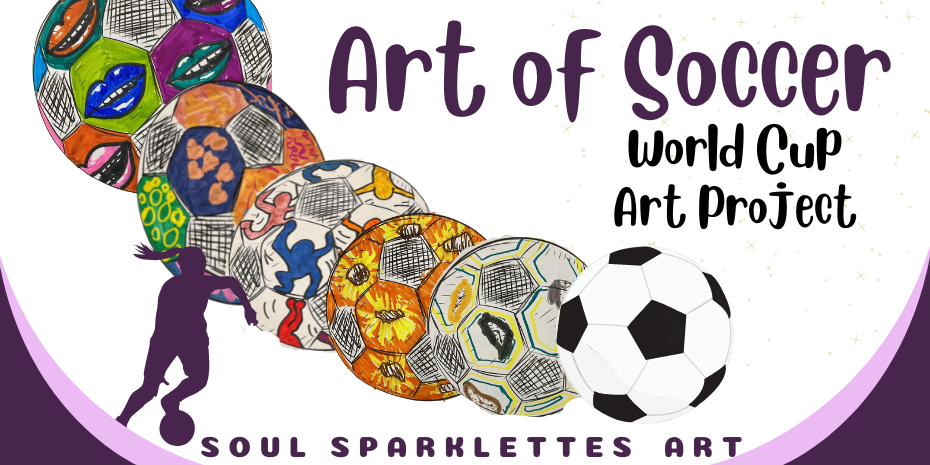

In [24]:
# importing libaries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
years=[1930,1934,1938,1950,1954,1958,1962,1966,1970,1974,1978,1982,1986,1990,1994,1998,2002,2006,2010,2014,2018,2022]

In [29]:
# Extracting Required Data from the sites


def get_matches(year) :

  # website url
  url=f'https://en.wikipedia.org/wiki/{year}_FIFA_World_Cup'

  resposne=requests.get(url)
  content=resposne.text
  soup= BeautifulSoup(content,'lxml')

  # empty list
  Home=[]
  Score=[]
  Away=[]

  # soup.findAll('tag','class name')  --- Syntax
  matches=soup.find_all('div',class_='footballbox')
  for match_ in matches:
      Home.append(match_.find('th',class_='fhome').get_text())
      Score.append( match_.find('th',class_='fscore').get_text())
      Away.append(match_.find('th',class_='faway').get_text())

  dict_football={'home':Home,'Score':Score,'Away':Away}
  df_fifa =pd.DataFrame(dict_football)
  df_fifa['Year'] = year
  return df_fifa


In [33]:
get_matches(2022)

,home,Score,Away,Year
0,Qatar,0–2,Ecuador,2022
1,Senegal,0–2,Netherlands,2022
2,Qatar,1–3,Senegal,2022
3,Netherlands,1–1,Ecuador,2022
4,Ecuador,1–2,Senegal,2022
...,...,...,...,...
59,England,1–2,France,2022
60,Argentina,3–0,Croatia,2022
61,France,2–0,Morocco,2022
62,Croatia,2–1,Morocco,2022


In [38]:
# for year in years:
#   get_matches(year)

# using list comp
fifa=[get_matches(year) for year in years]
df_fifa=pd.concat(fifa,ignore_index=True)

In [39]:
# to get data in csv
df_fifa.to_csv('Fifa_wc_matches.csv',index=False)

In [44]:
# final df
df_fifa.sample(10)

,home,Score,Away,Year
818,Australia,0–2,Peru,2018
145,Chile,2–0,Italy,1962
901,Switzerland,1–0,Cameroon,2022
225,Soviet Union,0–1 (a.e.t.),Uruguay,1970
640,Brazil,1–0,Croatia,2006
530,Brazil,4–1,Chile,1998
67,Sweden,2–2,Paraguay,1950
540,Germany,0–3,Croatia,1998
138,Soviet Union,2–0,Yugoslavia,1962
353,Italy,3–2,Brazil,1982
